In [ ]:
!unzip kotak_noise.zip
!unzip target.zip
!unzip soal.zip

In [ ]:
import cv2 
import matplotlib.pyplot as plt

c = cv2.imread('target/0.bmp')
print(c.shape)

(24, 24, 3)


In [ ]:
import glob
import numpy as np

X = []
Y = []

for i in range(10000):
  img = cv2.imread('kotak_noise/'+str(i)+'.bmp')
  img = cv2.resize(img, (24,24))/255
  X.append(img)

for i in range(10000):
  img = cv2.imread('target/'+str(i)+'.bmp')
  img = cv2.resize(img, (24,24))/255
  Y.append(img)

X = np.asarray(X).astype(float)
Y = np.asarray(Y).astype(float)

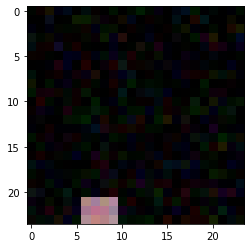

In [ ]:
plt.imshow(X[0])

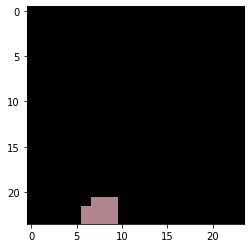

In [ ]:
plt.imshow(Y[0])

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
import tensorflow as tf

enc = Sequential()
enc.add(Conv2D(8, (3,3), input_shape=(24, 24, 3), strides=2, padding='same', activation='relu'))
enc.add(Conv2D(16, (3,3), strides=2, padding='same', activation='relu'))

dec1 = Sequential()
dec1.add(Conv2DTranspose(16, (3, 3), padding='same', strides=2, activation='relu'))
dec1.add(Conv2DTranspose(8, (3, 3), strides=2, padding='same', activation='relu'))
dec1.add(Conv2D(3, (3, 3), padding='same', activation='sigmoid'))

dec2 = Sequential()
dec2.add(Conv2DTranspose(16, (3, 3), padding='same', strides=2, activation='relu'))
dec2.add(Conv2DTranspose(8, (3, 3), strides=2, padding='same', activation='relu'))
dec2.add(Conv2D(3, (3, 3), padding='same', activation='sigmoid'))

class AE1(Model):
    def __init__(self):
        super(AE1, self).__init__()
        self.enc = enc
        self.dec1 = dec1
        
    def call(self, x):
        _ = self.enc(x)
        _ = self.dec1(_)
        return _
    
ae1 = AE1()
ae1.compile(optimizer='adam', loss='mse')

class AE2(Model):
    def __init__(self):
        super(AE2, self).__init__()
        #self.enc = enc 
        self.dec2 = dec2
        
    def call(self, x):
        _ = ae1.enc(x)
        _ = self.dec2(_)
        return _
    
ae2 = AE2()
ae2.compile(optimizer='adam', loss='mse')

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
ae1.fit(X, X, batch_size=2, epochs=100, validation_split=0.2, callbacks=[callback])
ae2.fit(X, Y, batch_size=2, epochs=100, validation_split=0.2, callbacks=[callback])

In [ ]:
sidik = ae1.enc(X[:])
Pred = ae2.dec2(sidik)

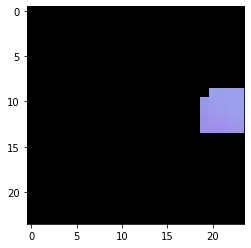

In [ ]:
plt.imshow(Pred[3])

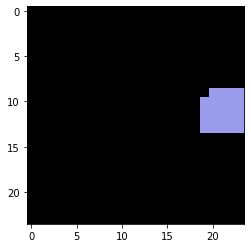

In [ ]:
plt.imshow(Y[3])

(24, 24, 3)

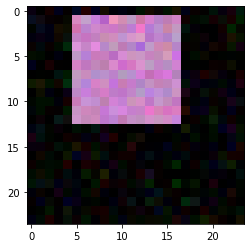

In [ ]:
soal = cv2.imread('soal/999.bmp')
plt.imshow(soal)
soal.shape

In [ ]:
X_soal = []

for i in range(1000):
  img = cv2.imread('soal/'+str(i)+'.bmp')
  img = cv2.resize(img, (24,24))/255
  X_soal.append(img)

X_soal = np.asarray(X_soal).astype(float)

In [ ]:
X_soal.shape

(1000, 24, 24, 3)

In [ ]:
sidik = ae1.enc(X_soal[:])
Pred_kuis = ae2.dec2(sidik)

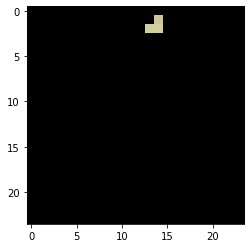

In [ ]:
plt.imshow(Pred_kuis[0])

In [ ]:
!mkdir Jawaban

In [ ]:
# Mengiterasi setiap gambar dalam hasil predict
for i, image in enumerate(Pred_kuis):
    image = np.squeeze(image)
    image = image*255
    cv2.imwrite('Jawaban/'+str(i)+'.bmp', image)

772


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

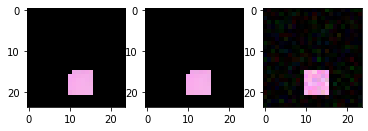

In [ ]:
import random
x = random.randint(0, 1000)
print(x)
fig , (a,b,c) = plt.subplots(nrows=1, ncols=3)

a.imshow(Pred_kuis[x])
jwb = cv2.imread('Jawaban/'+str(x)+'.bmp')
sl = cv2.imread('soal/'+str(x)+'.bmp')
b.imshow(jwb)
c.imshow(sl)
plt.imshow

In [ ]:
 !zip -r Jawaban.zip /content/Jawaban